# 1st Activity

### The 'airquality' dataset contains measurements of ozone concentration (Ozone) radiation (Solar.R), wind speed (Wind), and air temperature (Temp) from May to September. Let's analyze the data by following steps below

In [62]:
# read the airquality dataset, save it to a data frame df, and check the contents

import pandas as pd

df = pd.read_csv("../../data/airquality.csv")

df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [ ]:
# check the number of missing values in each column and the number of rows containing missing values
df.isnull().sum(),  df.isnull().any(axis=1).sum() # total missing values

(Ozone      37
 Solar.R     7
 Wind        0
 Temp        0
 Month       0
 Day         0
 dtype: int64,
 np.int64(42))

In [64]:
# Remove rows containing missing values and save them in df_clean
df_clean = df.dropna()
df_clean

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [65]:
# remove outliers in ozone concentration using IQR 
Q1 = df_clean['Ozone'].quantile(0.25)
Q3 = df_clean['Ozone'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_clean[(df_clean['Ozone'] >= Q1 - 1.5 * IQR) & (df_clean['Ozone'] <= Q3 + 1.5 * IQR)]

df_clean

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


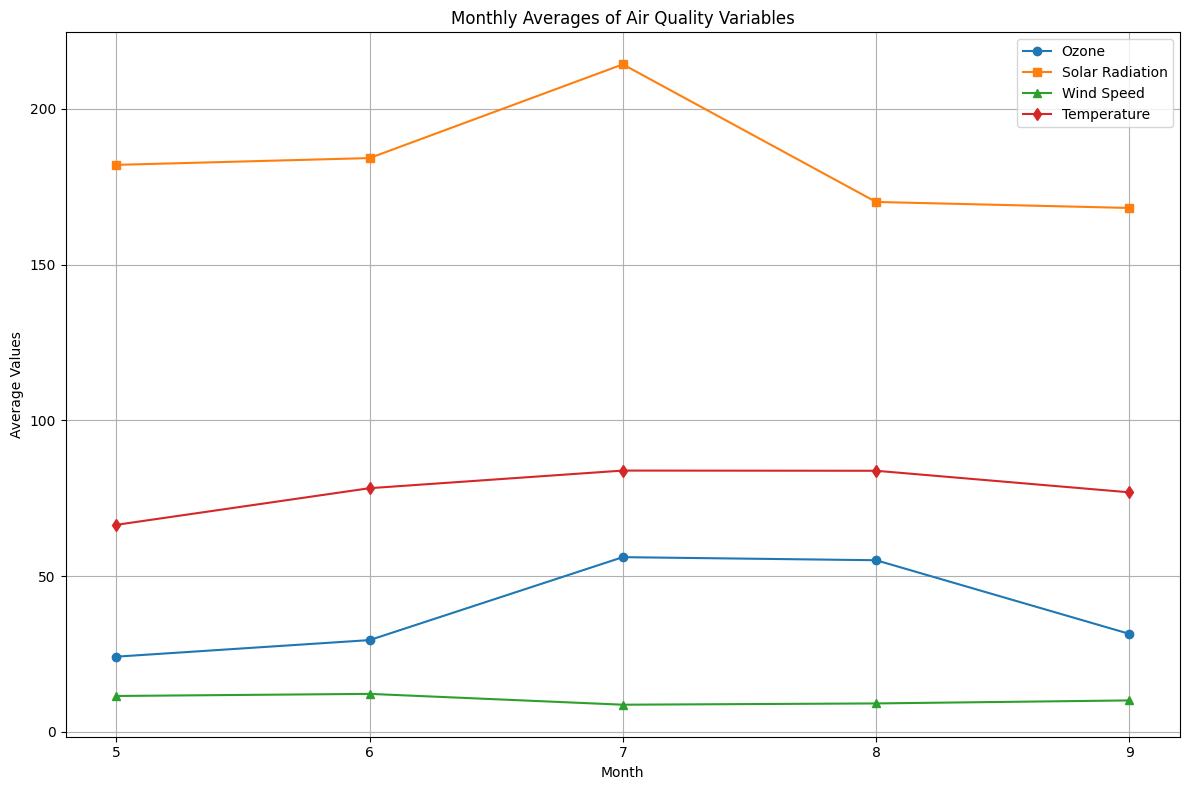

In [66]:
# compute monthly averages of ozone concentration, solar radiation, wind speed, and temperature and plot the results on the line graph

import matplotlib.pyplot as plt

monthly_avg = df_clean.groupby('Month')[['Ozone', 'Solar.R', 'Wind', 'Temp']].mean()


plt.figure(figsize=(12, 8))
plt.plot(monthly_avg.index, monthly_avg['Ozone'], marker='o', label='Ozone')
plt.plot(monthly_avg.index, monthly_avg['Solar.R'], marker='s', label='Solar Radiation')
plt.plot(monthly_avg.index, monthly_avg['Wind'], marker='^', label='Wind Speed')
plt.plot(monthly_avg.index, monthly_avg['Temp'], marker='d', label='Temperature')

plt.title('Monthly Averages of Air Quality Variables')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.legend()
plt.grid(True)
plt.xticks(monthly_avg.index)
plt.tight_layout()
plt.show()